# Logistic Regression

In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# import sklearn models
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = load_iris(return_X_y=True)
X[:10], y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [3]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [5]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [10]:
probs_y=classifier.predict_proba(X_test)
probs_y[:10]

array([[9.71472766e-01, 2.85261694e-02, 1.06473553e-06],
       [9.49578215e-01, 5.04204736e-02, 1.31096721e-06],
       [9.84774178e-01, 1.52253217e-02, 5.00155629e-07],
       [9.35378247e-01, 6.46106331e-02, 1.11201281e-05],
       [3.45774407e-02, 9.46817825e-01, 1.86047347e-02],
       [2.74323800e-02, 8.57652353e-01, 1.14915267e-01],
       [4.09656508e-02, 8.81209276e-01, 7.78250731e-02],
       [9.52677030e-01, 4.73216540e-02, 1.31557581e-06],
       [6.56612595e-02, 6.85693663e-01, 2.48645077e-01],
       [3.66989088e-04, 3.22080468e-01, 6.77552543e-01]])

In [11]:
probs_y = np.round(probs_y, 2)
probs_y[:10]

array([[0.97, 0.03, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.03, 0.95, 0.02],
       [0.03, 0.86, 0.11],
       [0.04, 0.88, 0.08],
       [0.95, 0.05, 0.  ],
       [0.07, 0.69, 0.25],
       [0.  , 0.32, 0.68]])

In [12]:
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test",
                                                         "y_pred", 
                                                         "Setosa(%)",
                                                         "versicolor(%)",
                                                         "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) 
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
0          | 0          | 0.97       | 0.03          | 0.0       
0          | 0          | 0.95       | 0.05          | 0.0       
0          | 0          | 0.98       | 0.02          | 0.0       
0          | 0          | 0.94       | 0.06          | 0.0       
1          | 1          | 0.03       | 0.95          | 0.02      
1          | 1          | 0.03       | 0.86          | 0.11      
1          | 1          | 0.04       | 0.88          | 0.08      
0          | 0          | 0.95       | 0.05          | 0.0       
1          | 1          | 0.07       | 0.69          | 0.25      
2          | 2          | 0.0        | 0.32          | 0.68      
2          | 2          | 0.0        | 0.01          | 0.99      
2          | 2          | 0.0        | 0.21          | 0.79      
1          | 1          | 0.04       | 0.94          | 0.02      
2       

In [13]:
classifier.score(X_test, y_test)

0.9736842105263158

# Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


In [16]:
df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.08333333, 0.91666667]])

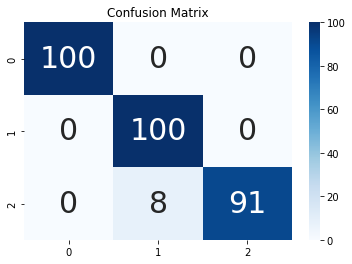

In [17]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## Implement logistic regression using gradient descent.


**Maximum likelihood estimation.**

Loss function.

$$
    L = -[(\sum_{i=1}{y^{(i)} log(h(x^{(i)})) + (1 - y^{(i)}) log(1 - h(x^{(i)}))}) + l * (W)^2]
$$
where 
$$
    h(X, W) = \frac{1}{1 + exp(-X'W)}
$$

recall, derivative of sigmoid
$$
    \frac{dS(x)}{dx} = S(x)(1 - S(x))
$$

If we take the partial derivative of the loss function w.r.t weight j we get.

$$
    -( \frac{y}{h(y_{p})} * S(y_{p})(1-S(y_{p})) * x_{j} + 
$$
$$
    +\frac{1 - y}{1 - h(y_{p})} * -S(1 - y_{p})(1-S(1-y_{p})) * x_{j} + lam * 2sign(w_{j}))
$$

**now we can simplify it.**

$$
    -( y * (1-S(y_{p})) * x_{j} + (1 - y) * -S(1 - y_{p}) * x_{j} + lam * 2sign(w_{j}))
$$

<img src="grad.png" width=700 />

In [18]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [19]:
class ImpBinarLR:
    
    def __init__(self):
        self.coef_ = np.empty(0)
        self.loss_scores = []
    
    def __init_coef(self, l):
        #                       weights + bias
        self.coef_ = np.random.normal(0, 1, l)
        self.loss_scores = []
    
    def fit(self, X, y, n_iters=100, lr=0.01, lmb=0.1):
        # TODO
        X = np.c_[np.ones(len(X)), X]
        self.__init_coef(X.shape[1])
        
        for i in range(n_iters):
            
            for y_t, x in zip(y, X):
                y_p = self._pred(x, add_newaxis=False)
                
                gradient_w = (y_t - y_p)*x + lmb * np.sign(self.coef_)

                self.coef_ += lr * -(-gradient_w)
    
            self.loss_scores.append(ImpBinarLR.log_loss(y, self._pred(X, add_newaxis=False)))

    def _pred(self, X, add_newaxis=True):
        # prepare data for bias + weights dot
        if add_newaxis:
            X = np.c_[np.ones(len(X)), X]
        
        if self.coef_.size == 0:
            self.__init_coef(X.shape[1])
        
        a = np.dot(X, self.coef_)
        return ImpBinarLR.sigmoid(a)
        
    def predict(self, X):
        # TODO
        return np.round(self._pred(X)).astype(np.int8)
    
    @property
    def coef(self):
        return self.coef_[1:]
    
    @property
    def intercept(self):
        return self.coef_[0]
    
    @staticmethod
    def log_loss(y_target, y_pred):
        # TODO
        pred = y_pred.copy()
        pred[pred == 0] = 1e-6
        pred[pred == 1] = 1 - 1e-6
        return - np.sum(y_target * np.log(pred) + (1 - y_target) * np.log(1 - pred))
    
    @staticmethod
    def sigmoid(x):
        # TODO
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sig_der(x):
        return ImpBinarLR.sigmoid(x) * (1 - ImpBinarLR.sigmoid(x))

In [20]:
X, y = make_classification(200, 5, n_classes=2)

In [21]:
X.min(), X.max()

(-3.3992574629593757, 3.2138844096366537)

In [22]:
bin_log_reg = ImpBinarLR()

In [23]:
bin_log_reg.fit(X, y, n_iters=1500, lr=0.005, lmb=0.001)

([<matplotlib.lines.Line2D at 0x13e2c3160>], 57.66053803930551)

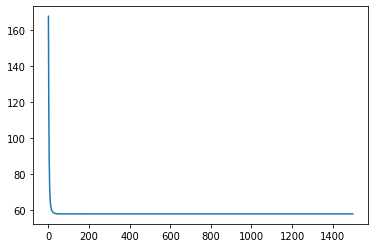

In [24]:
plt.plot(bin_log_reg.loss_scores), min(bin_log_reg.loss_scores)

In [25]:
accuracy_score(y, bin_log_reg.predict(X))

0.915

**Now let's create multiclass logistic regression.**

In [26]:
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))

softmax([0.1, 0.2, 0.1])

array([0.32204346, 0.35591307, 0.32204346])

In [27]:
# one-vs-rest 
class ImpLogisticRegression:
    
    def __init__(self):
        self.__init_reg()
        
    def __init_reg(self):
        self.binar_log_regs = []
        
    def fit(self, X, y, **kwargs):
        self.__init_reg()
        
        unique_y, count = np.unique(y, return_counts=True)
        
        for y_u in unique_y:
            mask = (y == y_u)
            y_target = y.copy()
            y_target[mask] = 1
            y_target[~mask] = 0
            log_reg = ImpBinarLR()
            
            log_reg.fit(X, y_target, **kwargs)
            self.binar_log_regs.append(log_reg)

    def predict_prob(self, X):
        return np.array([softmax(i) for i in np.array([reg._pred(X_test) for reg in log_reg.binar_log_regs]).T])
            
    def predict(self, X):
        return np.argmax([reg._pred(X) for reg in self.binar_log_regs], axis=0)

In [28]:
X_iris, y_iris = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, shuffle=True, stratify=y_iris, random_state=2021) 

In [29]:
log_reg = ImpLogisticRegression()

In [30]:
log_reg.fit(X_train, y_train, n_iters=1000, lr=0.01)

In [31]:
accuracy_score(y_test, log_reg.predict(X_test))

0.7631578947368421

In [32]:
log_reg.predict_prob(X_test)[:10]

array([[0.57611687, 0.21194157, 0.21194155],
       [0.42714819, 0.41571278, 0.15713904],
       [0.57611687, 0.21194157, 0.21194157],
       [0.49360284, 0.32481082, 0.18158634],
       [0.21194209, 0.57611583, 0.21194209],
       [0.21195412, 0.57609176, 0.21195412],
       [0.32865413, 0.34269174, 0.32865413],
       [0.21115917, 0.21485068, 0.57399015],
       [0.21193729, 0.57610504, 0.21195767],
       [0.21193345, 0.21197486, 0.57609169]])

# 1. Solve classification problem using 'classification.csv' dataset

#### visualise the date, do some EDA, find feature importance

In [33]:
default = pd.read_csv('classification.csv')
default.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


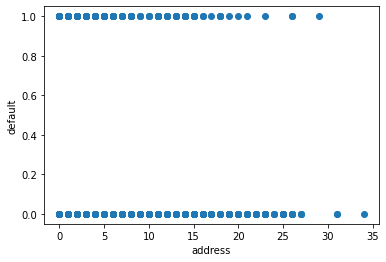

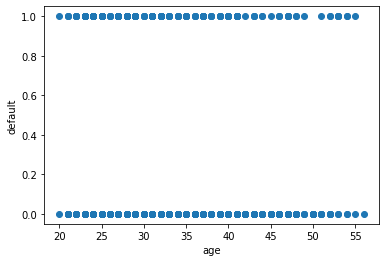

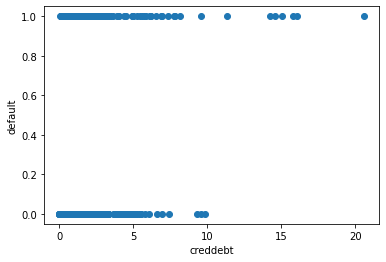

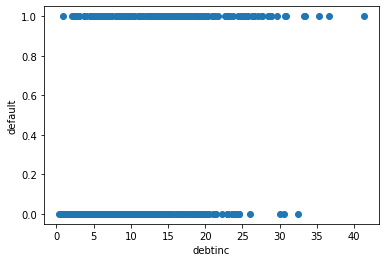

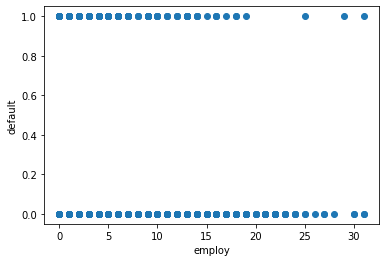

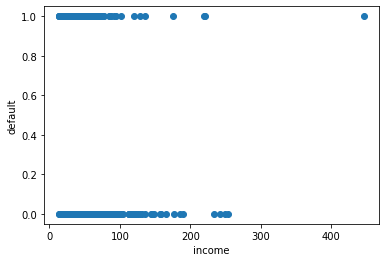

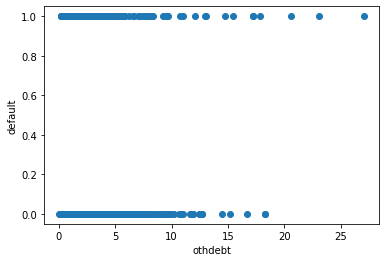

In [34]:
for feature in default.columns.difference(['default', 'ed']):
    plt.xlabel(feature)
    plt.ylabel('default')
    plt.scatter(default[feature], default.default)
    plt.show()

In [35]:
default.corr()

,age,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
employ,0.536497,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [36]:
df_train, df_test = default[default.columns.difference(['default'])].copy(), default.default.copy()

In [37]:
# we can see that "ed" column has inbalanced amount of categories.
df_train["ed"].value_counts()

no high school    372
high school       198
college degree     87
undergraduate      38
postgraduate        5
Name: ed, dtype: int64

In [38]:
for feature, col in zip(df_train["ed"].unique(), pd.get_dummies(df_train["ed"]).values.T):
    df_train[feature] = col

In [39]:
# check if one-hot-enciding has been done correctly
np.all(default[default.ed.unique()].sum(axis=1) == 1)

KeyError: "None of [Index(['college degree', 'no high school', 'high school', 'undergraduate',\n       'postgraduate'],\n      dtype='object')] are in the [columns]"

In [40]:
df_train.pop("ed");

In [41]:
df_train.head()

,address,age,creddebt,debtinc,employ,income,othdebt,college degree,no high school,high school,undergraduate,postgraduate
0,12,41,11.359392,9.3,17,176,5.008608,1,0,0,0,0
1,6,27,1.362202,17.3,10,31,4.000798,0,0,1,0,0
2,14,40,0.856075,5.5,15,55,2.168925,0,0,1,0,0
3,14,41,2.658720,2.9,15,120,0.821280,0,0,1,0,0
4,0,24,1.787436,17.3,2,28,3.056564,0,1,0,0,0


In [42]:
# numerical cols
df_train.columns[:7]

Index(['address', 'age', 'creddebt', 'debtinc', 'employ', 'income', 'othdebt'], dtype='object')

In [43]:
# we don't have negative values in dataset, so we can use MinMaxScaling
np.where(df_train.values < 0)

(array([], dtype=int64), array([], dtype=int64))

In [44]:
for col in df_train.columns[:7]:
    scaler = MinMaxScaler()
    df_train[col] = scaler.fit_transform(df_train[col].values.reshape(-1, 1))

In [45]:
df_train.head()

,address,age,creddebt,debtinc,employ,income,othdebt,college degree,no high school,high school,undergraduate,postgraduate
0,0.352941,0.583333,0.552210,0.217604,0.548387,0.375000,0.183897,1,0,0,0,0
1,0.176471,0.194444,0.065719,0.413203,0.322581,0.039352,0.146554,0,0,1,0,0
2,0.411765,0.555556,0.041090,0.124694,0.483871,0.094907,0.078677,0,0,1,0,0
3,0.411765,0.583333,0.128811,0.061125,0.483871,0.245370,0.028742,0,0,1,0,0
4,0.000000,0.111111,0.086412,0.413203,0.064516,0.032407,0.111567,0,1,0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)

In [47]:
log_reg = ImpLogisticRegression()
log_reg.fit(X_train, y_train, n_iters=1000, lr=0.01, lmb=0.1)

In [48]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.825

#### Implement "confusion_matrix" and "f1_score" functions

Let's define confution matrix.

Some terminology.

* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

More in detail about it [here](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

In [49]:
class ConfutionMatrix:

    def __init__(self, y_target, y_pred):
        assert(len(y_target) == len(y_pred)), "label and pred should have the same length"
        mask = y_target == 1
        self.PC = sum(y_pred == 1)
        self.PI = sum(y_pred == 0)
        self.AC = sum(y_target == 1)
        self.AI = sum(y_target == 0)
        self.TP = sum((y_target == y_pred)[mask])
        self.TN = sum((y_target == y_pred)[~mask])
        self.FP = sum((y_target != y_pred)[mask])
        self.FN = sum((y_target != y_pred)[~mask])

        self.matrix = np.array([[self.TP, self.TN], [self.FP, self.FN]])

    def accuracy(self):
        return (self.TP + self.TN) / (self.AC + self.AI)

    def rates(self):
        return self.matrix / np.array([[self.AC, self.AI], [self.AC, self.AI]])

    def mat(self):
        return self.matrix

    @property
    def recall(self):
        return self.TP / self.AC

    @property
    def precision(self):
        return self.TN / self.PC

    @property
    def prevalence(self):
        return self.AC / (self.AC + self.AI)

    @property
    def sensitivity(self):
        return self.recall

    @property
    def specificity(self):
        return self.TN / self.AI

In [50]:
conf_mat = ConfutionMatrix(y_test, y_pred)

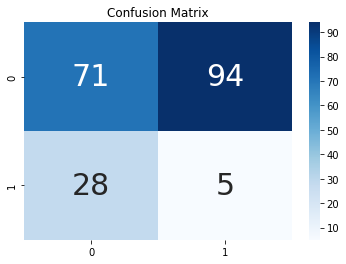

In [51]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (conf_mat.rates()*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

<img src="F1-Score.png" width=400 />

In [52]:
def f1_score(conf_matrix) -> float:
    assert(conf_matrix.mat().shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
    # TODO
    return 2 * (conf_matrix.recall * conf_matrix.precision) / (conf_matrix.recall + conf_matrix.precision)

## Print accuracy, confusion matrix, precision, recall, sensitivity and specifity on train and test (and maybe validation) datasets.

#### Do not use any libraries for metrics, implement yourself

In [53]:
# def accuracy_score(conf_matrix: np.array) -> float:
#     assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
#     if sum(sum(conf_matrix)) == 0:
#         return 'NA'
#     return sum(np.diag(conf_matrix)) / sum(sum(conf_matrix))

# def precision_score(conf_matrix: np.array) -> float:
#     assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
#     if sum(conf_matrix[:,1]) == 0:
#         return 'NA'
#     return conf_matrix[1, 1] / sum(conf_matrix[:,1])

# def recall_score(conf_matrix: np.array) -> float:
#     assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
#     if sum(conf_matrix[1,:]) == 0:
#         return 'NA'
#     return conf_matrix[1, 1] / sum(conf_matrix[1,:])

# sensitivity_score = recall_score

# def specificity_score(conf_matrix: np.array) -> float:
#     assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
#     if sum(conf_matrix[0,:]) == 0:
#         return 'NA'
#     return conf_matrix[0, 0] / sum(conf_matrix[0,:])

In [54]:
conf_mat = ConfutionMatrix(y_train, log_reg.predict(X_train))

print("Train Accuracy:", conf_mat.accuracy())
print("Train Precision:", conf_mat.precision)
print("Train Recall:", conf_mat.recall)
print("Train Sensitivity:", conf_mat.sensitivity)
print("Train Specificity:", conf_mat.specificity)
print("Train F1 Score:", f1_score(conf_mat), end='\n\n')

conf_mat = ConfutionMatrix(y_test, log_reg.predict(X_test))

print("Train Accuracy:", conf_mat.accuracy())
print("Train Precision:", conf_mat.precision)
print("Train Recall:", conf_mat.recall)
print("Train Sensitivity:", conf_mat.sensitivity)
print("Train Specificity:", conf_mat.specificity)
print("Train F1 Score:", f1_score(conf_mat), end='\n\n')

Train Accuracy: 0.86875
Train Precision: 1.0724637681159421
Train Recall: 0.7926829268292683
Train Sensitivity: 0.7926829268292683
Train Specificity: 0.9487179487179487
Train F1 Score: 0.9115891215768029

Train Accuracy: 0.825
Train Precision: 1.125
Train Recall: 0.7142857142857143
Train Sensitivity: 0.7142857142857143
Train Specificity: 0.9473684210526315
Train F1 Score: 0.8737864077669902

